# Imports

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [50]:
accident_df = pd.read_csv('./Data/accident.csv')

# EDA

In [51]:
accident_df.columns = accident_df.columns.str.lower().str.replace(' ', '_')

accident_df.head(5)

,age,gender,speed_of_impact,helmet_used,seatbelt_used,survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [52]:
# the dataset is small
# so i will use a simpler model
# i will also use k-fold-cross-validation or leave-one-out-cross-validation

accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              200 non-null    int64  
 1   gender           199 non-null    object 
 2   speed_of_impact  197 non-null    float64
 3   helmet_used      200 non-null    object 
 4   seatbelt_used    200 non-null    object 
 5   survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


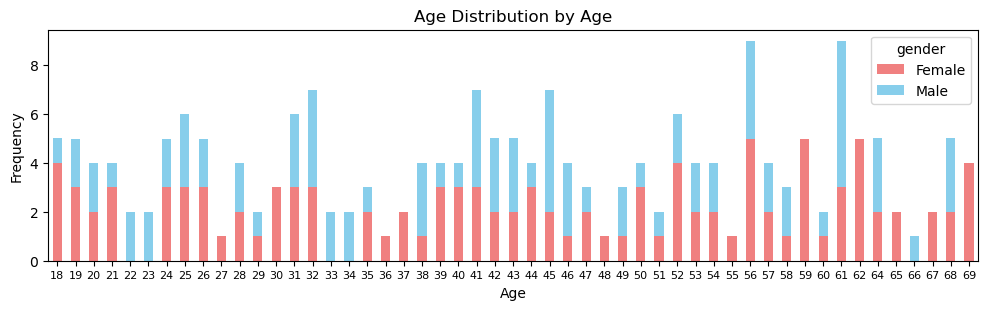

In [53]:
gdf = accident_df.groupby(['age', 'gender']).size().unstack(fill_value=0).plot(
    kind='bar', stacked=True, color=['lightcoral', 'skyblue'], figsize=(12, 3)
)
plt.title('Age Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=0, fontsize=8)
plt.show()

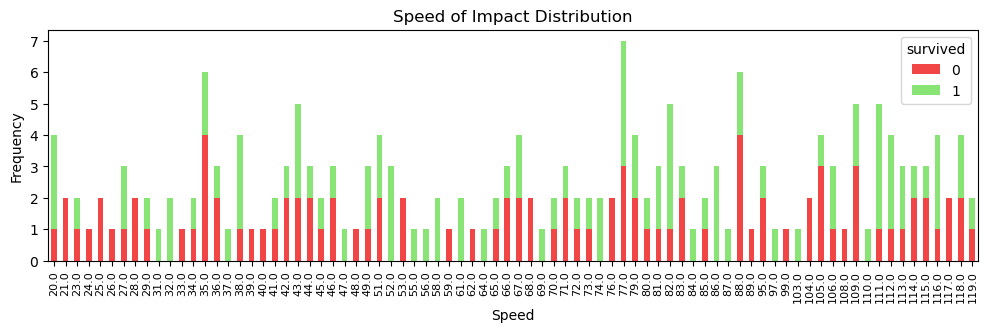

In [54]:
gdf = accident_df.groupby(['speed_of_impact', 'survived']).size().unstack(fill_value=0).plot(
    kind='bar', stacked=True, color=['#F24545', '#88E474'], figsize=(12, 3)
)
plt.title('Speed of Impact Distribution')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.xticks(rotation=90, fontsize=8)
plt.show()

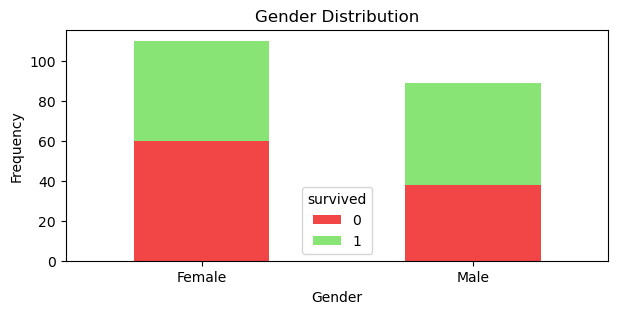

In [55]:
accident_df.groupby(['gender', 'survived']).size().unstack(fill_value=0).plot(
    kind='bar', stacked=True, color=['#F24545', '#88E474'], figsize=(7, 3)
)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


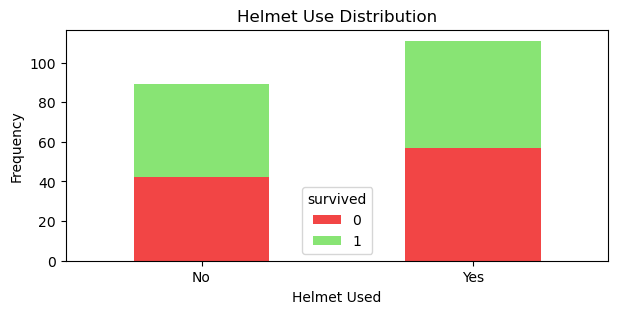

In [56]:
accident_df.groupby(['helmet_used', 'survived']).size().unstack(fill_value=0).plot(
    kind='bar', stacked=True, color=['#F24545', '#88E474'], figsize=(7, 3)
)
plt.title('Helmet Use Distribution')
plt.xlabel('Helmet Used')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


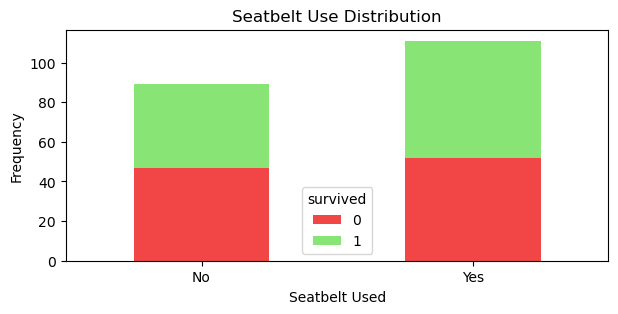

In [57]:
accident_df.groupby(['seatbelt_used', 'survived']).size().unstack(fill_value=0).plot(
    kind='bar', stacked=True, color=['#F24545', '#88E474'], figsize=(7, 3)
)
plt.title('Seatbelt Use Distribution')
plt.xlabel('Seatbelt Used')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Feature Engineering

In [58]:
# map seatbelt_used to binary
accident_df['seatbelt_used'] = accident_df['seatbelt_used'].map({
    'Yes': 1,
    'No': 0
})

# map helmet_used to binary
accident_df['helmet_used'] = accident_df['helmet_used'].map({
    'Yes': 1,
    'No': 0
})

# create a gender_male feature
accident_df = pd.get_dummies(accident_df, columns=['gender'], drop_first=True)
accident_df.columns = accident_df.columns.str.lower()

# map it to binary
accident_df['gender_male'] = accident_df['gender_male'].map({
    True: 1,
    False: 0
})

In [59]:
accident_df.head()

,age,speed_of_impact,helmet_used,seatbelt_used,survived,gender_male
0,56,27.0,0,0,1,0
1,69,46.0,0,1,1,0
2,46,46.0,1,1,0,1
3,32,117.0,0,1,0,1
4,60,40.0,1,1,0,0


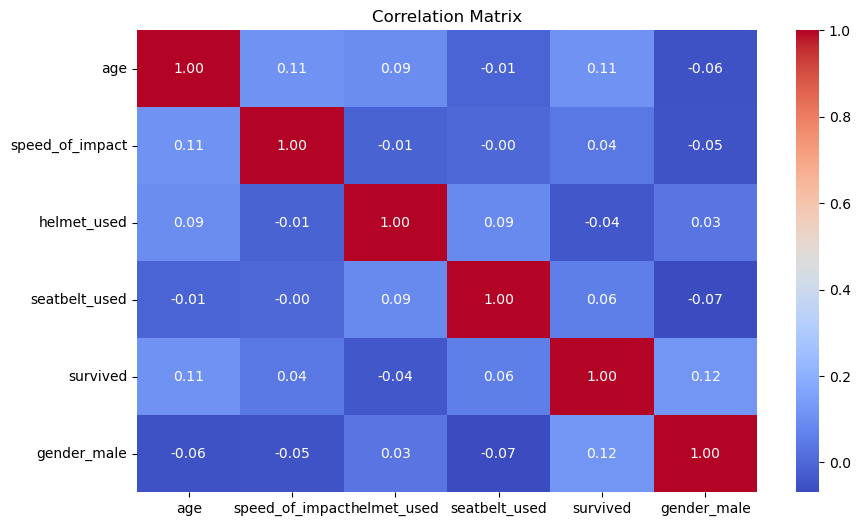

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(accident_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()